In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### 1. Dataset
Load the prostate dataset. 

In [2]:
#TODO 
train = pd.read_csv('data/prostate_train.csv') 
test = pd.read_csv('data/prostate_test.csv')
print(type(train))

<class 'pandas.core.frame.DataFrame'>


We will use the target $y=$lpsa throughout this exercise, and all other features as predictors $X$, so split the train and test sets by $X,y$.

In [3]:
#TODO
Xtrain, ytrain = train.iloc[:,:8], train.iloc[:,8]
Xtest, ytest = test.iloc[:,:8], test.iloc[:,8]


### 2. Ridge Regression
Perform Ridge regression with target lpsa and all other features as predictors. Do so for different regularization parameters $\lambda$.
Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.238, Fig. 6.4.

<function matplotlib.pyplot.show(close=None, block=None)>

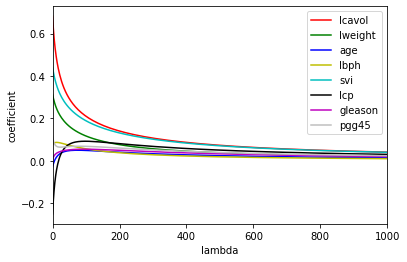

In [13]:
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error
    
# This is an example of possible values for the lambda that you can consider.
lambdas = np.logspace(-5, 5, 200)
variable1=[]
variable2=[]
variable3=[]
variable4=[]
variable5=[]
variable6=[]
variable7=[]
variable8=[]
alphaarr=[]



for alpha in lambdas:
    ridge = Ridge(alpha)

    ridge.fit(Xtrain, ytrain)

    #train and test scorefor ridge regression
    train_score = ridge.score(Xtrain, ytrain)
    test_score = ridge.score(Xtest, ytest)
    #print("\nRidge Model............................................\n")
    #print("The train score for ridge model is {}".format(train_score))
    #print("The test score for ridge model is {}".format(test_score))
    coeff=ridge.coef_

    
    
    
    
    
    variable1.append(coeff[0])
    variable2.append(coeff[1])
    variable3.append(coeff[2])
    variable4.append(coeff[3])
    variable5.append(coeff[4])
    variable6.append(coeff[5])
    variable7.append(coeff[6])
    variable8.append(coeff[7])
    
    alphaarr.append(alpha)
    

        

    #plt.plot(Xtrain.columns.to_list(),ridge.coef_,alpha)
    #plt.show()
plt.plot(alphaarr,variable1,color='r', label='lcavol')
plt.plot(alphaarr,variable2,color='g', label='lweight')
plt.plot(alphaarr,variable3,color='b', label='age')
plt.plot(alphaarr,variable4,color='y', label='lbph')
plt.plot(alphaarr,variable5,color='c', label='svi')
plt.plot(alphaarr,variable6,color='k', label='lcp')
plt.plot(alphaarr,variable7,color='m', label='gleason')
plt.plot(alphaarr,variable8,color='0.75', label='pgg45')


plt.xlim([0,1000])

plt.xlabel("lambda")
plt.ylabel("coefficient")

  

plt.legend()
  

plt.show

We can observe that as the lambda value becomes large after a certain point, the coefficient estimate values become flatter and start to almost converge to zero for very large values of lambda. Hence, the model is underfitting and converging to a null model.

### 3. Cross Validation & Ridge
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ for the ridge regression model.

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold


# K-fold cross validation
folds = 10

#TODO

# define model
ridge_model = Ridge()
# define model evaluation method
cross_val = KFold(n_splits=folds)
# define grid
grid = dict()
grid['alpha'] = lambdas


# define search
search = GridSearchCV(ridge_model, grid, scoring='neg_mean_absolute_error', cv=cross_val, n_jobs=-1)
# perform the search
output = search.fit(Xtrain, ytrain)
# summarize
#print('MAE: %.3f' % results.best_score_)
print('The optimal value of lambda: %s' % output.best_params_['alpha'])

best_lambda=output.best_params_['alpha']

The optimal value of lambda: 3.3700643292719317


Report train and test error measured in MSE for this $\lambda$.

In [6]:
ridge_error = Ridge(alpha=best_lambda)
ridge_error.fit(Xtrain, ytrain)

y_train_pred = ridge_error.predict(Xtrain)
y_test_pred = ridge_error.predict(Xtest)

coeff_train=mean_squared_error(ytrain, y_train_pred)
coeff_test=mean_squared_error(ytest, y_test_pred)

print('MSE train:',coeff_train)
print('MSE test:',coeff_test)

MSE train: 0.4783320428402304
MSE test: 0.448887342995658


### 4. Lasso Regression
Perform Lasso regression with target lpsa and all other features as predictors. Do so for different parameters $\lambda$.

Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.242, Fig. 6.6.

<function matplotlib.pyplot.show(close=None, block=None)>

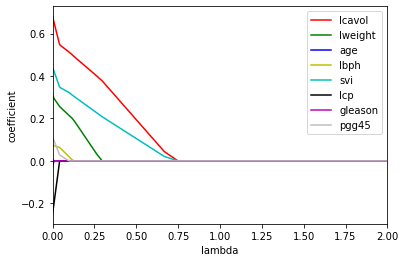

In [10]:
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_squared_error
    
# This is an example of possible values for the lambda that you can consider.
lambdas = np.logspace(-5, 5, 200)
variable1=[]
variable2=[]
variable3=[]
variable4=[]
variable5=[]
variable6=[]
variable7=[]
variable8=[]
alphaarr=[]

for alpha in lambdas:
    lasso = Lasso(alpha)

    lasso.fit(Xtrain, ytrain)

    #train and test scorefor ridge regression
    train_score_lasso = lasso.score(Xtrain, ytrain)
    test_score_lasso = lasso.score(Xtest, ytest)
    #print("\nLasso Model............................................\n")
    #print("The train score for lasso model is {}".format(train_score_lasso))
    #print("The test score for lasso model is {}".format(test_score_lasso))
    
    coeff=lasso.coef_
    
    

    variable1.append(coeff[0])
    variable2.append(coeff[1])
    variable3.append(coeff[2])
    variable4.append(coeff[3])
    variable5.append(coeff[4])
    variable6.append(coeff[5])
    variable7.append(coeff[6])
    variable8.append(coeff[7])
    
    alphaarr.append(alpha)
 
    

        

#plt.plot(Xtrain.columns.to_list(),ridge.coef_,alpha)
#plt.show()


    
plt.plot(alphaarr,variable1,color='r', label='lcavol')
plt.plot(alphaarr,variable2,color='g', label='lweight')
plt.plot(alphaarr,variable3,color='b', label='age')
plt.plot(alphaarr,variable4,color='y', label='lbph')
plt.plot(alphaarr,variable5,color='c', label='svi')
plt.plot(alphaarr,variable6,color='k', label='lcp')
plt.plot(alphaarr,variable7,color='m', label='gleason')
plt.plot(alphaarr,variable8,color='0.75', label='pgg45')

plt.xlim([0,2])

plt.xlabel("lambda")
plt.ylabel("coefficient")


plt.legend()
  

plt.show
   

We observe that all the lambda values converge to 0 whereas in the 2nd plot, the values almost converge to 0.  As most of the lambda values converge to 0 at a comparatively early stage, we can say that the model is overfitting.

## 5. Cross Validation & Lasso
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ in the Lasso.
		Report train and test error measured in MSE for this $\lambda$. 

In [11]:
# K-fold cross validation
folds = 10

#TODO

# define model
lasso_model = Lasso()
# define model evaluation method
cross_val = KFold(n_splits=folds)
# define grid
grid = dict()
grid['alpha'] = lambdas


# define search
lasso_search = GridSearchCV(lasso_model, grid, scoring='neg_mean_absolute_error', cv=cross_val, n_jobs=-1)
# perform the search
lasso_output = lasso_search.fit(Xtrain, ytrain)
# summarize
#print('MAE: %.3f' % results.best_score_)
print('The optimal lasso values of lambda: %s' % lasso_output.best_params_['alpha'])

best_lambda_lasso=lasso_output.best_params_['alpha']

The optimal lasso values of lambda: 0.01304901978014403


In [12]:
lasso_error = Lasso(alpha=best_lambda_lasso)
lasso_error.fit(Xtrain, ytrain)

y_train_pred_lasso = lasso_error.predict(Xtrain)
y_test_pred_lasso = lasso_error.predict(Xtest)

coeff_train_lasso=mean_squared_error(ytrain, y_train_pred_lasso)
coeff_test_lasso=mean_squared_error(ytest, y_test_pred_lasso)

print('MSE train:',coeff_train_lasso)
print('MSE test:',coeff_test_lasso)

MSE train: 0.4770035950533954
MSE test: 0.45870543161200994


How many and which features are used?
		Compare this to the coefficients determined for ridge regression in part 3 of this exercise.

## 6. 

Compare the performance, in terms of MSE, of the best models in parts 3. and 5. Which model would you choose and why? What alternative model could have been used?

Considering the performance from the models generated in 3 and 5 we can say that ridge regression is a better model for this dataset as the train and test errors are lower as compared to lasso regression. 
We could use Elastic nets which are a combination of both, Ridge and Lasso regression models. Partial Least Squares regression or Continuum regression as an alternate models to the ridge regression model.

Reference: https://www.researchgate.net/post/Is-there-any-alternative-to-the-ridge-regression-method